# Задание 2.3

## Практика

In [1]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

In [3]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5],
[np.nan, np.nan], [0.75, -1.3]],
index=['a', 'b', 'c', 'd'],
columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [4]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [5]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [6]:
df.mean(axis=1, skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [7]:
df.idxmax()

one    b
two    d
dtype: object

In [8]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [9]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [10]:
obj = Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
df = pd.read_csv('files/fortune500.csv')
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [12]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [13]:
df["of1"] = np.random.randint(10000, size=len(df))
df.tail()

,year,rank,company,revenue,profit,of1
25495,2005,496,Wm. Wrigley Jr.,3648.6,493.0,6345
25496,2005,497,Peabody Energy,3631.6,175.4,5362
25497,2005,498,Wendy's International,3630.4,57.8,1369
25498,2005,499,Kindred Healthcare,3616.6,70.6,7810
25499,2005,500,Cincinnati Financial,3614.0,584.0,885


In [15]:
df.revenue.corr(df.of1)

np.float64(-0.0043327736196085995)

In [16]:
df.revenue.cov(df.of1)

np.float64(-143185.95318013185)

In [23]:
df = df.drop('company', axis=1)

In [24]:
df.corr()

,year,rank,revenue,profit,of1
year,1.000000,-0.002677,0.365016,0.169832,-0.002497
rank,-0.002677,1.000000,-0.362945,-0.184791,0.003727
revenue,0.365016,-0.362945,1.000000,0.477046,-0.004333
profit,0.169832,-0.184791,0.477046,1.000000,0.009066
of1,-0.002497,0.003727,-0.004333,0.009066,1.000000


In [25]:
df.cov()

,year,rank,revenue,profit,of1
year,218.000131,-5.708142,6.142140e+04,2.943098e+03,-1.069271e+02
rank,-5.708142,20863.780303,-5.974712e+05,-3.132795e+04,1.560858e+03
revenue,61421.400457,-597471.225004,1.298853e+08,6.381109e+06,-1.431860e+05
profit,2943.098224,-31327.954756,6.381109e+06,1.377562e+06,3.085651e+04
of1,-106.927068,1560.857718,-1.431860e+05,3.085651e+04,8.408312e+06


In [26]:
df.corrwith(df.of1)

year      -0.002497
rank       0.003727
revenue   -0.004333
profit     0.009066
of1        1.000000
dtype: float64

In [27]:
df2=df.profit*(-1)
df.corrwith(df2)

year      -0.169832
rank       0.184791
revenue   -0.477046
profit    -1.000000
of1       -0.009066
dtype: float64

In [29]:
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [30]:
obj.value_counts()

c    3
a    3
b    2
d    1
Name: count, dtype: int64

In [31]:
pd.value_counts(obj.values, sort=False)

C:\Users\ngorb\AppData\Local\Temp\ipykernel_21000\3084372382.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(obj.values, sort=False)


c    3
a    3
d    1
b    2
Name: count, dtype: int64

In [32]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [33]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [34]:
data = DataFrame({'Qu1': [1, 3, 4, 3, 4],
									'Qu2': [2, 3, 1, 2, 3],
									'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [35]:
result = data.apply(pd.value_counts).fillna(0)
result

C:\Users\ngorb\AppData\Local\Temp\ipykernel_21000\1382616601.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  result = data.apply(pd.value_counts).fillna(0)


,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

C:\Users\ngorb\AppData\Local\Temp\ipykernel_21000\4033520091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(data)


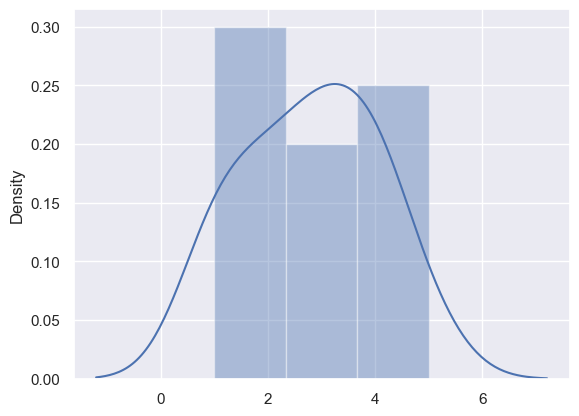

In [37]:
sns_plot = sns.distplot(data)
fig = sns_plot.get_figure()

C:\Users\ngorb\AppData\Local\Temp\ipykernel_21000\4006101427.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(result)


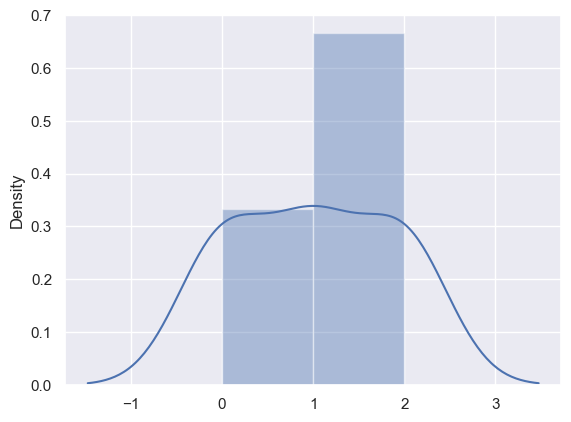

In [38]:
sns_plot = sns.distplot(result)
fig = sns_plot.get_figure()

In [39]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [40]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

In [41]:
from numpy import nan as NA
data = Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [42]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [43]:
data = DataFrame([[1., 6.5, 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [44]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [45]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [46]:
data[4] = NA
data
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [47]:
df = DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA; df.iloc[:2, 2] = NA
df

,0,1,2
0,0.110245,NaN,NaN
1,0.290169,NaN,NaN
2,0.728250,NaN,-0.130365
3,-0.343252,NaN,0.831321
4,-0.761026,0.332669,2.172075
5,-1.727344,-0.509629,0.452002
6,2.112959,0.003104,-0.621970


In [48]:
df.dropna(thresh=3)

,0,1,2
4,-0.761026,0.332669,2.172075
5,-1.727344,-0.509629,0.452002
6,2.112959,0.003104,-0.621970


In [49]:
df.fillna(0)

,0,1,2
0,0.110245,0.000000,0.000000
1,0.290169,0.000000,0.000000
2,0.728250,0.000000,-0.130365
3,-0.343252,0.000000,0.831321
4,-0.761026,0.332669,2.172075
5,-1.727344,-0.509629,0.452002
6,2.112959,0.003104,-0.621970


In [50]:
df.fillna({1: 0.5, 3: -1})

,0,1,2
0,0.110245,0.500000,NaN
1,0.290169,0.500000,NaN
2,0.728250,0.500000,-0.130365
3,-0.343252,0.500000,0.831321
4,-0.761026,0.332669,2.172075
5,-1.727344,-0.509629,0.452002
6,2.112959,0.003104,-0.621970


In [51]:
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,0.110245,0.000000,0.000000
1,0.290169,0.000000,0.000000
2,0.728250,0.000000,-0.130365
3,-0.343252,0.000000,0.831321
4,-0.761026,0.332669,2.172075
5,-1.727344,-0.509629,0.452002
6,2.112959,0.003104,-0.621970


In [52]:
df = DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA; df.iloc[4:, 2] = NA
df

,0,1,2
0,1.606938,2.148788,0.326412
1,1.521984,-1.455729,1.920736
2,-0.184797,NaN,0.939562
3,0.842314,NaN,-0.125990
4,0.453160,NaN,NaN
5,2.331392,NaN,NaN


In [53]:
df.fillna(method='ffill')

C:\Users\ngorb\AppData\Local\Temp\ipykernel_21000\1193302488.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,0,1,2
0,1.606938,2.148788,0.326412
1,1.521984,-1.455729,1.920736
2,-0.184797,-1.455729,0.939562
3,0.842314,-1.455729,-0.125990
4,0.453160,-1.455729,-0.125990
5,2.331392,-1.455729,-0.125990


In [54]:
df.fillna(method='ffill', limit=2)

C:\Users\ngorb\AppData\Local\Temp\ipykernel_21000\2719175769.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', limit=2)


,0,1,2
0,1.606938,2.148788,0.326412
1,1.521984,-1.455729,1.920736
2,-0.184797,-1.455729,0.939562
3,0.842314,-1.455729,-0.125990
4,0.453160,NaN,-0.125990
5,2.331392,NaN,-0.125990


In [55]:
data = Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

In [56]:
data = Series(np.random.randn(10),
							index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
							[1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])
data

a  1   -1.309560
   2   -0.361398
   3    0.307237
b  1    1.645682
   2   -0.769624
   3    0.656606
c  1    1.598764
   2    0.845216
d  2    0.865407
   3   -0.963455
dtype: float64

In [57]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [58]:
data['b']
data['b':'c']

b  1    1.645682
   2   -0.769624
   3    0.656606
c  1    1.598764
   2    0.845216
dtype: float64

In [59]:
data.loc['b':'d']

b  1    1.645682
   2   -0.769624
   3    0.656606
c  1    1.598764
   2    0.845216
d  2    0.865407
   3   -0.963455
dtype: float64

In [60]:
data.unstack()

,1,2,3
a,-1.309560,-0.361398,0.307237
b,1.645682,-0.769624,0.656606
c,1.598764,0.845216,NaN
d,NaN,0.865407,-0.963455


In [61]:
data.unstack().stack()

a  1   -1.309560
   2   -0.361398
   3    0.307237
b  1    1.645682
   2   -0.769624
   3    0.656606
c  1    1.598764
   2    0.845216
d  2    0.865407
   3   -0.963455
dtype: float64

In [62]:
frame = DataFrame(np.arange(12).reshape((4, 3)),
									index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
									columns=[['Ohio', 'Ohio', 'Colorado'],
									['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [63]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [64]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [65]:
pd.MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']], names=['state', 'color'])

MultiIndex([(    'Ohio', 'Green'),
            (    'Ohio',   'Red'),
            ('Colorado', 'Green')],
           names=['state', 'color'])

In [66]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [74]:
frame = DataFrame({'a': range(7), 'b': range(7, 0, -1),
									'c': ['one', 'one', 'one', 'two', 'two',
									'two', 'two'],
									'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [75]:
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [76]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [77]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


In [78]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 2.4 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.8 MB 5.9 MB/s eta 0:00:02
   ---------------------------------- ----- 8.4/9.8 MB 15.8 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 15.7 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   ------------------

Could not find platform independent libraries <prefix>


In [80]:
import statsmodels.api as sm
import pandas as pd
data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data

In [81]:
df.dtypes

YEAR           float64
SUNACTIVITY    float64
dtype: object

In [82]:
df

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [83]:
fractional_nums = df['SUNACTIVITY'].apply(lambda x: x % 1)
fractional_nums[fractional_nums > 0].head()

49    0.9
50    0.4
51    0.7
52    0.8
53    0.7
Name: SUNACTIVITY, dtype: float64

In [84]:
df['SUNACTIVITY'].describe()

count    309.000000
mean      49.752104
std       40.452595
min        0.000000
25%       16.000000
50%       40.000000
75%       69.800000
max      190.200000
Name: SUNACTIVITY, dtype: float64

<Axes: xlabel='YEAR'>

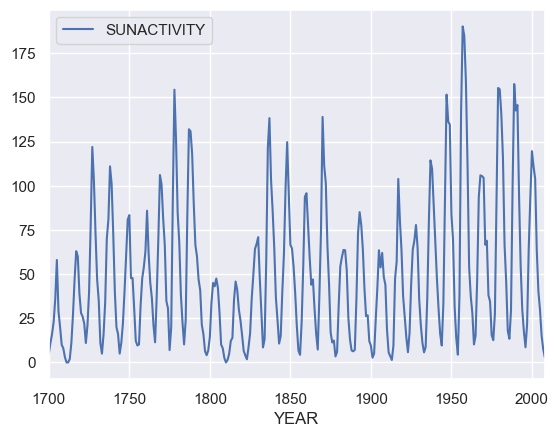

In [85]:
df.plot(x='YEAR', y='SUNACTIVITY', xlim=(1700,2008))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

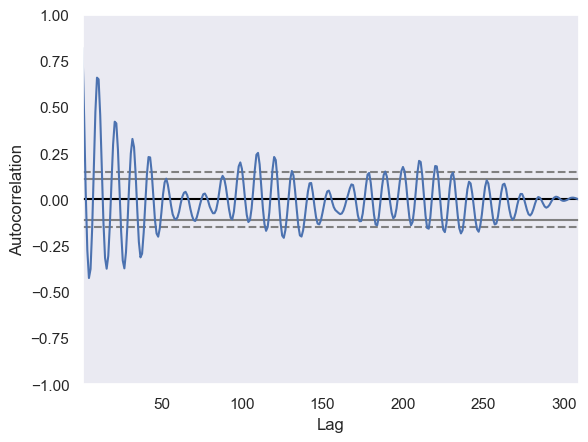

In [86]:
pd.plotting.autocorrelation_plot(df['SUNACTIVITY'])

In [87]:
N2 = df.shape[0] // 2
freqs = np.linspace(0.0, 0.5, num=N2, endpoint=False)[1:]

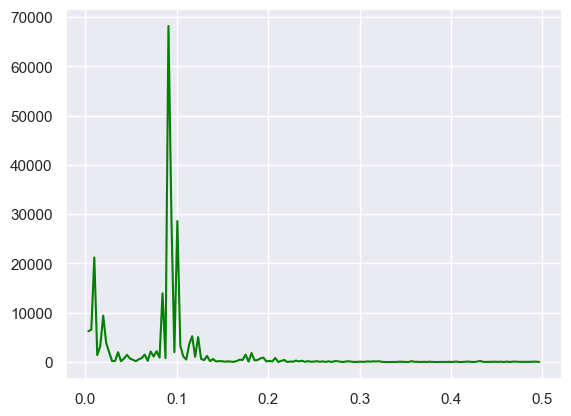

In [89]:
import scipy as sp
periodogram = sp.signal.lombscargle(df['YEAR'],
df['SUNACTIVITY'], freqs * 2 * np.pi)
plt.plot(freqs, periodogram, color='green')

In [90]:
freq_index_at_max_power = np.argmax(periodogram)
print('Frequency and corresponding time in years at max power:%.2f, %.1f' % (freqs[freq_index_at_max_power], 1 / freqs[freq_index_at_max_power]))

Frequency and corresponding time in years at max power:0.09, 11.0


## Самостоятельная

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

data = load_iris()
data.target[[10, 25, 50]]
list(data.target_names)
data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
columns= data['feature_names'] + ['target'])
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [2]:
data1.sum(axis=1)

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    19.2
146    17.7
147    18.7
148    19.3
149    17.8
Length: 150, dtype: float64

In [4]:
data1.idxmax()

sepal length (cm)    131
sepal width (cm)      15
petal length (cm)    118
petal width (cm)     100
target               100
dtype: int64

In [5]:
data1.cumsum()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,10.0,6.5,2.8,0.4,0.0
2,14.7,9.7,4.1,0.6,0.0
3,19.3,12.8,5.6,0.8,0.0
4,24.3,16.4,7.0,1.0,0.0
...,...,...,...,...,...
145,851.6,446.7,543.0,171.9,142.0
146,857.9,449.2,548.0,173.8,144.0
147,864.4,452.2,553.2,175.8,146.0
148,870.6,455.6,558.6,178.1,148.0


In [6]:
data1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# Описательные статистики

descriptive_stats = data1.describe().T
descriptive_stats = descriptive_stats[['mean', '50%', 'std', 'min', 'max', 'count']]
descriptive_stats.rename(columns={'50%': 'median'}, inplace=True)

# Статистики с группировкой по видам ирисов (target)
grouped_stats = data1.groupby('target').agg({
    'sepal length (cm)': ['mean', 'median', 'std', 'min', 'max'],
    'sepal width (cm)': ['mean', 'median', 'std', 'min', 'max'],
    'petal length (cm)': ['mean', 'median', 'std', 'min', 'max'],
    'petal width (cm)': ['mean', 'median', 'std', 'min', 'max']
})

grouped_stats

sepal length (cm)                            sepal width (cm)         \
                    mean median       std  min  max             mean median   
target                                                                        
0.0                5.006    5.0  0.352490  4.3  5.8            3.428    3.4   
1.0                5.936    5.9  0.516171  4.9  7.0            2.770    2.8   
2.0                6.588    6.5  0.635880  4.9  7.9            2.974    3.0   

                           petal length (cm)                             \
             std  min  max              mean median       std  min  max   
target                                                                    
0.0     0.379064  2.3  4.4             1.462   1.50  0.173664  1.0  1.9   
1.0     0.313798  2.0  3.4             4.260   4.35  0.469911  3.0  5.1   
2.0     0.322497  2.2  3.8             5.552   5.55  0.551895  4.5  6.9   

       petal width (cm)                             
                   mean median       std  min  max  
target                                              
0.0               0.246    0.2  0.105386  0.1  0.6  
1.0               1.326    1.3  0.197753  1.0  1.8  
2.0               2.026    2.0  0.274650  1.4  2.5

In [11]:
# редукция данных

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Отделяем признаки и целевую переменную
X = data1.iloc[:, :4]
y = data1['target']

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Создание DataFrame с главными компонентами
pca_df = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2']
)

# Объединение с целевой переменной
final_df = pd.concat([pca_df, y], axis=1)

final_df

,PC1,PC2,target
0,-2.264703,0.480027,0.0
1,-2.080961,-0.674134,0.0
2,-2.364229,-0.341908,0.0
3,-2.299384,-0.597395,0.0
4,-2.389842,0.646835,0.0
...,...,...,...
145,1.870503,0.386966,2.0
146,1.564580,-0.896687,2.0
147,1.521170,0.269069,2.0
148,1.372788,1.011254,2.0


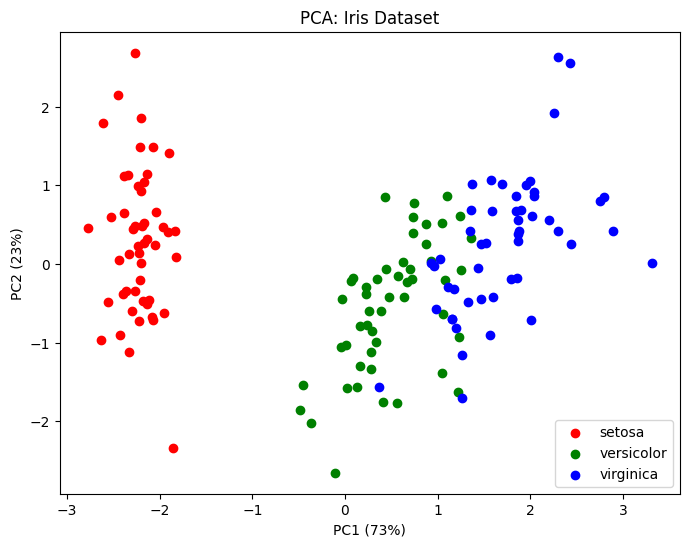

: 

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
targets = [0, 1, 2]
names = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']

for target, color, name in zip(targets, colors, names):
    plt.scatter(
        final_df.loc[final_df['target'] == target, 'PC1'],
        final_df.loc[final_df['target'] == target, 'PC2'],
        c=color,
        label=name
    )
    
plt.xlabel('PC1 (73%)')
plt.ylabel('PC2 (23%)')
plt.legend()
plt.title('PCA: Iris Dataset')
plt.show()